In [1]:
#mathematical calculation and statistical imputation
import pandas as pd
import numpy as np
#Visualisation
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
#label encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#training _testing conversion
from sklearn.model_selection import train_test_split
# dimension reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
#model building and Metrics for model evaluation
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble, linear_model, neural_network
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#model saving
import pickle
#ignore warning
import warnings
warnings.filterwarnings("ignore")


mushrooms = pd.read_csv('E:/iNueron/Mashrum/mushrooms.csv')

#displaying top 5 rows of Dataframe
mushrooms.head(5)

#Description of Data
mushrooms.describe()

#Detailed info of Data
mushrooms.info()






#checking null values
mushrooms.isnull().sum()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [11]:
#finding unqiue values in all columns
for col in list(mushrooms):
    print(col)
    print(mushrooms[col].unique())

#label encoding
le=LabelEncoder()
for i in mushrooms.columns:
    mushrooms[i]=le.fit_transform(mushrooms[i])


class
[1 0]
cap-shape
[5 0 4 2 3 1]
cap-surface
[2 3 0 1]
cap-color
[4 9 8 3 2 5 0 7 1 6]
bruises
[1 0]
odor
[6 0 3 5 2 1 8 7 4]
gill-attachment
[1 0]
gill-spacing
[0 1]
gill-size
[1 0]
gill-color
[ 4  5  2  7 10  3  9  1  0  8 11  6]
stalk-shape
[0 1]
stalk-root
[3 2 1 4 0]
stalk-surface-above-ring
[2 0 1 3]
stalk-surface-below-ring
[2 0 3 1]
stalk-color-above-ring
[7 3 6 4 0 2 5 1 8]
stalk-color-below-ring
[7 6 3 0 4 2 8 5 1]
veil-type
[0]
veil-color
[2 0 1 3]
ring-number
[1 2 0]
ring-type
[4 0 2 1 3]
spore-print-color
[2 3 6 1 7 5 4 8 0]
population
[3 2 0 4 5 1]
habitat
[5 1 3 0 4 6 2]


In [12]:
X = mushrooms.drop(['class'],axis=1)
y = mushrooms['class']
# Label encoding y - dependent variable
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

# One hot encoding independent variable x
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()
print(X)













[1 0 0 ... 0 1 0]
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
#Splitting into train and test
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=0)

#shape of splitted data
x_train.shape,x_test.shape,y_train.shape,y_test.shape

#PCA analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

x_train.shape,x_test.shape


((6093, 3), (2031, 3))

In [14]:
#Step 5: Model Building
#Logistic Regression
# Training the Logistic Regression Model on the Training set
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state = 0)
LR_classifier.fit(x_train, y_train)

# Predicting the test set
y_pred = LR_classifier.predict(x_test)
# Making the confusion matrix and calculating accuracy score
acscore = []
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
acscore.append(ac)
print(cm)
print(ac)

[[1012   49]
 [ 196  774]]
0.879369768586903


In [15]:
# Naive Bayes
# Training the Naive Bayes Classification model on the Training set
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()
NB_classifier.fit(x_train, y_train)
# Training the Naive Bayes Classification model on the Training set
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()
NB_classifier.fit(x_train, y_train)

# Predicting the test set
y_pred = NB_classifier.predict(x_test)
# Making the confusion matrix and calculating the accuarcy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
acscore.append(ac)
print(cm)
print(ac)

[[1036   25]
 [ 195  775]]
0.8916789758739537


In [16]:
# Support Vector Machine
# Training the RBF Kernel SVC on the Training set
from sklearn.svm import SVC
SVM_classifier = SVC(kernel = 'rbf', random_state=0)
SVM_classifier.fit(x_train, y_train)

# predicting test set
y_pred = SVM_classifier.predict(x_test)
# Making the confusion matrix and calculating the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
acscore.append(ac)
print(cm)
print(ac)


[[1017   44]
 [  32  938]]
0.9625800098473658


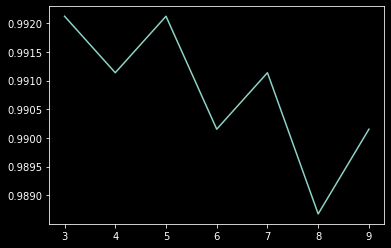

[[1060    1]
 [  15  955]]
0.9921221073362876


In [17]:
# K - Nearest
# Neighbors(KNN)
# Calculating the optimum number of neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

list1 = []
for neighbors in range(3, 10, 1):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test, y_pred))

list1
plt.plot(list(range(3,10,1)), list1)
plt.show()

# Training the K Nearest Neighbor Classification on the Training set
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
KNN_classifier.fit(x_train, y_train)

# Predicting the test set
y_pred = KNN_classifier.predict(x_test)

# Making the confusion matrix and calculating the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
acscore.append(ac)
print(cm)
print(ac)



In [18]:
# Decison Tree
# Training the Decision Tree Classification on the Training set
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
DT_classifier.fit(x_train, y_train)

# Predicting the test set
y_pred = DT_classifier.predict(x_test)
# Making the confusion matrix and calculating the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
acscore.append(ac)
print(cm)
print(ac)


[[1055    6]
 [  13  957]]
0.9906450024618415


In [19]:
# XGBoost
# Training the XGBoost Classification on the Training set
from xgboost import XGBClassifier
XGB_classifier = XGBClassifier()
XGB_classifier.fit(x_train,y_train)

# Predicting the test set
y_pred = XGB_classifier.predict(x_test)
# Making the confusion matrix and calculating the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
acscore.append(ac)
print(cm)
print(ac)


[10:27:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[1059    2]
 [  11  959]]
0.9935992122107337


In [ ]:

# Random Forest
# Finding the optimum number of n_estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,150):
    RF_classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    RF_classifier.fit(x_train, y_train)
    y_pred = RF_classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,150)), list1)
plt.show()

# Training the Random Forest Classification on the Training set
from sklearn.ensemble import RandomForestClassifier
RF_classifier_est = RandomForestClassifier(criterion = 'entropy', random_state = 0, n_estimators = 115)
RF_classifier_est.fit(x_train, y_train)

# Predicting the test set
y_pred = RF_classifier_est.predict(x_test)

# Making the confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
acscore.append(ac)
print(cm)
print(ac)

In [ ]:
# Printing accuracy score of all the classification models we have applied
print(acscore)

models = ['LogisticRegression','NaiveBayes','KernelSVM','KNearestNeighbors','DecisionTree','XGBoost','RandomForest']

# Visualising the accuracy score of each classification model
plt.rcParams['figure.figsize']=15,8
plt.style.use('dark_background')
ax = sns.barplot(x=models, y=acscore, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()


#So among all classification model Random Forest Classification has highest accuracy score = 99.70%.

Pkl_Filename = "Pickle_RF_Model.pkl"
with open(Pkl_Filename, 'wb') as file:
    pickle.dump(RF_classifier_est, file)
# Load the Model back from file
# with open(Pkl_Filename, 'rb') as file:
#     Pickled_RF_Model = pickle.load(file)

#Pickled_RF_Model

# Use the loaded pickled model to make predictions
# Pickled_RF_Model.predict(x_test)